# **Credit Card Users Churn Prediction**

## **Description**
### **Background & Context**

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

### **Objective**

* Explore and visualize the dataset.
* Build a classification model to predict if the customer is going to churn or not.
* Optimize the model using appropriate techniques.
* Generate a set of insights and recommendations that will help the bank.

### **Data Dictionary:**

* **CLIENTNUM**: Client number. Unique identifier for the customer holding the account
* **Attrition_Flag**: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* **Customer_Age**: Age in Years
* **Gender**: Gender of the account holder
* **Dependent_count**: Number of dependents
* **Education_Level**:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
* **Marital_Status**: Marital Status of the account holder
* **Income_Category**: Annual Income Category of the account holder
* **Card_Category**: Type of Card
* **Months_on_book**: Period of relationship with the bank
* **Total_Relationship_Count**: Total no. of products held by the customer
* **Months_Inactive_12_mon**: No. of months inactive in the last 12 months
* **Contacts_Count_12_mon**: No. of Contacts between the customer and bank in the last 12 months
* **Credit_Limit**: Credit Limit on the Credit Card
* **Total_Revolving_Bal**: The balance that carries over from one month to the next is the revolving balance
* **Avg_Open_To_Buy**: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* **Total_Trans_Amt**: Total Transaction Amount (Last 12 months)
* **Total_Trans_Ct**: Total Transaction Count (Last 12 months)
* **Total_Ct_Chng_Q4_Q1**: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* **Total_Amt_Chng_Q4_Q1**: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* **Avg_Utilization_Ratio**: Represents how much of the available credit the customer spent


## Load All libraries needed for this project

In [540]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores and split data, and also to search for the best model using rnadomized search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score, plot_confusion_matrix

# To impute missing values
from sklearn.impute import KNNImputer, SimpleImputer

# All libraries needed for the six different models we need to create for this project
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To suppress the warnings
import warnings

warnings.filterwarnings("ignore")

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)


In [255]:
# Let's load the data
churners = pd.read_csv("BankChurners.csv")

In [256]:
# And take a quick look at how many rows and columns are there
churners.shape

(10127, 21)

There are 10,127 rows and 21 columns in the data.

We will make a copy and safeguard the data before we do any further analysis.

## **Initial Data Inspection**

In [257]:
# Make a copy
df = churners.copy()

In [258]:
# Quick look at first 5 rows of data
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [259]:
# And also the last 5 rows of data
df.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122         2152.000                 0.703            15476             117   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000                 0.535             8395              62   
10126         8427.000                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

In [260]:
# let's check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

There are 6 columns with strings in them, and the rest of them are all numerical column.

Two columns -- `Education_Level` and `Marital_Status` has a bunch of null data in them. The rest of the columns have non-null data. However, we should make sure that these are not full of NaN data.

In [261]:
# check for duplicate values in the data
df.duplicated().sum()

0

There are no duplicates. The CLIENTNUM column is a unique identifier of the customer and adds no value to the analysis. We can drop that column.

In [262]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

15% of records have missing data for `Education_Level`.
7.4% of records have missign data for `Marital_Status`.

We will need to look closely at them and impute data as needed.

In [263]:
# Let's look at all the string columns to look at the distirbution of data in these columns
str_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
for col in str_cols:
    print(df[col].value_counts())
    print('-'*30)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
------------------------------


* The target variable `Attrition_Flag` is really a True/False category. There are a lot more existing customers than there are attited customers -- almost 5:1 ratio.
* The target variable will need to be converted into a 0/1 representation in order to be able to do predictions.
* The various strings are really categorical data, and we should convert these columns to categorical.
* The income category has a strange category called 'abc' that needs to be looked at more carefully.

In [264]:
# Let's see the data distribution for all the numeric columns
df.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

* `Customer_Age` ranges from 26 to 73, which mean and median at 46. Expected to be a normal distribution.
* `Dependent_Count` ranges from 0 to 5 with median at 2. Slightly right skewed.
* `Months_on_book` ranges from 13 to 56 with median and mean at 36. Expected to be normal distribution.
* `Total_Relationship_Count` ranges from 1 to 6 with mean and median close to 4. Mostly normal distribution expected.
* `Months_Inactive_12_mon` ranges from 0 to 6. So no one has been inactive for more than 6 months.
* `Contacts_Count_12_mon` ranges from 0 to 6. So there exist some people who have had no interaction with bank in the last 12 months.
* `Credit_Limit` ranges from 1438 to 34516 with mean much higher than median. Indicates a strong right skew with number of outliers.
* `Total_Revolving_Bal` ranges from 0 to 2517. Need to see if the revolving balance of 0 is expected or if it is missing data.
* `Avg_Open_To_Buy` ranges from 3 to 34516. Indicates that some people fully tap into their credit history, while others don't.
* `Total_Trans_Amt` ranges from 510 to 18484 with mean and median close to 4000. This indicates quite a few outliers.
* `Total_Trans_Ct` ranges from 10 to 139 with mean at 65 and median at 67. So, mostly normal distribution expected.
* `Total_Amt_Chng_Q4_Q1` ranges from 0 to 3.397 with median and mean around 0.74. Indicates outliers on the right.
* `Total_Ct_Chng_Q4_Q1` ranges from 0 to 3.714 with median and mean at 0.7. Again outliers expected on the right.
* `Avg_Utilization_Ratio` ranges from 0 to 0.999, which corresponds to our previous observation that some people use all of their credit limit, which some don't use any.

In [265]:
# let's view the statistical summary of the non-numerical columns in the data
df.describe(exclude=np.number).T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

## **Data Pre-processing**

In [266]:
# Drop the CLIENTNUM column
df.drop(columns=["CLIENTNUM"], inplace=True)

In [267]:
# Convert the data in the Attrition_Flag column to 0 and 1. Existing customers are represented by 0.
df["Attrition_Flag"] = df["Attrition_Flag"].replace("Existing Customer", 0)
df["Attrition_Flag"] = df["Attrition_Flag"].replace("Attrited Customer", 1)

In [268]:
# Verify that the conversion was successful
df["Attrition_Flag"].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [269]:
# We had previously noted that there was an odd category of 'abc' for the income category. Let's look at the data itself to see if there is anything unusual
# about these records.
df[df['Income_Category']=='abc']

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
19                  0            45      F                2        Graduate   
28                  0            44      F                3      Uneducated   
39                  1            66      F                0       Doctorate   
44                  0            38      F                4        Graduate   
58                  0            44      F                5        Graduate   
...               ...           ...    ...              ...             ...   
10021               1            30      F                1        Graduate   
10040               1            50      F                3       Doctorate   
10083               0            42      F                4      Uneducated   
10092               1            40      F                3        Graduate   
10119               1            55      F                3      Uneducated   

      Marital_Status Income_Category Card_Category  Months_on_book  \
19           Married             abc          Blue              37   
28            Single             abc          Blue              34   
39           Married             abc          Blue              56   
44            Single             abc          Blue              28   
58           Married             abc          Blue              35   
...              ...             ...           ...             ...   
10021        Married             abc          Blue              18   
10040         Single             abc          Blue              36   
10083        Married             abc          Blue              23   
10092        Married             abc          Blue              25   
10119         Single             abc          Blue              47   

       Total_Relationship_Count  Months_Inactive_12_mon  \
19                            6                       1   
28                            5                       2   
39                            5                       4   
44                            2                       3   
58                            4                       1   
...                         ...                     ...   
10021                         4                       1   
10040                         4                       3   
10083                         4                       1   
10092                         1                       2   
10119                         4                       3   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
19                         2     14470.000                 1157   
28                         2     10100.000                    0   
39                         3      7882.000                  605   
44                         3      9830.000                 2055   
58                         2      6273.000                  978   
...                      ...           ...                  ...   
10021                      4      4377.000                 2517   
10040                      3      5173.000                    0   
10083                      2      8348.000                    0   
10092                      3      6888.000                 1878   
10119                      3     14657.000                 2517   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
19           13313.000                 0.966             1207              21   
28           10100.000                 0.525             1052              18   
39            7277.000                 1.052              704              16   
44            7775.000                 0.977             1042              23   
58            5295.000                 2.275             1359              25   
...                ...                   ...              ...             ...   
10021         1860.000                 0.941             8759              74   
10040         5173.000                 0.912           

There is nothing unusual about the data in the rest of the columns. So, this must be data-entry error, or perhaps the customer did not want to reveal their income.

Since there are 1112 records, which makes up almost 11% of records, we cannot drop these records. Let's replace them with NaN and impute later on.

In [270]:
df.loc[df['Income_Category']=='abc', 'Income_Category'] = np.NaN

In [333]:
# Verify that the conversion happened successfully
df['Income_Category'].isnull().sum()

1112

In [271]:
# Verify that the conversion happened successfully
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

In [272]:
# Let's convert all of the 5 remaining string columns into categorical columns
str_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
for col in str_cols:
    df[col] = df[col].astype('category')

In [273]:
# Verify that the columns have been converted to categories
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  int64   
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           9015 non-null   category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

## **Exploratory Data Analysis**

### Note
I am borrowing/copying some utility functions that were used in the MLS sessions instead of trying to create them on my own.

I am borrowing utility functions for univariate analysis as well as for bivariate analysis.

In [274]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [275]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### **Univariate Analysis**

First I will do some histogram and boxplots for the numerical variables that are continuous in nature.

Then I will do barplots for some of the numerical data as well as categorical data.

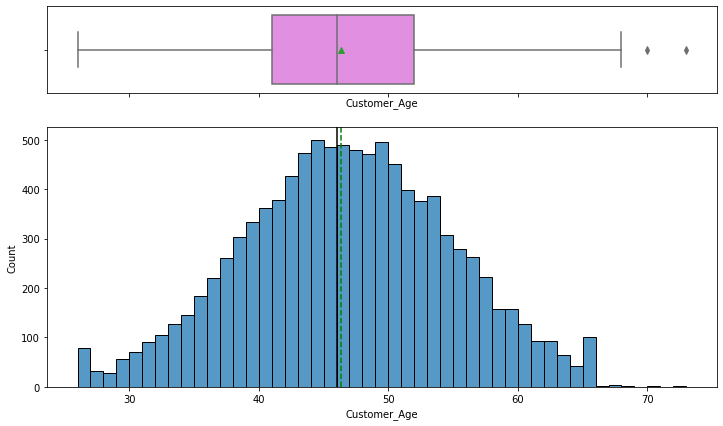

In [276]:
histogram_boxplot(df, "Customer_Age")

Mostly a normal curve with a couple of outliers. Customers can be ago 70 or above, so this doesn't need any outlier treatment.

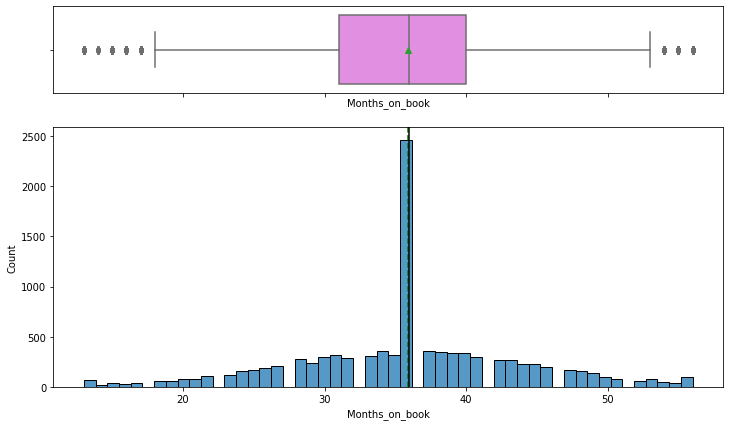

In [277]:
histogram_boxplot(df, "Months_on_book")

This is another normal distribution with a few outliers at both ends. The outliers look reasonable for the number of months of relationship with bank, so no outlier treatment required here.

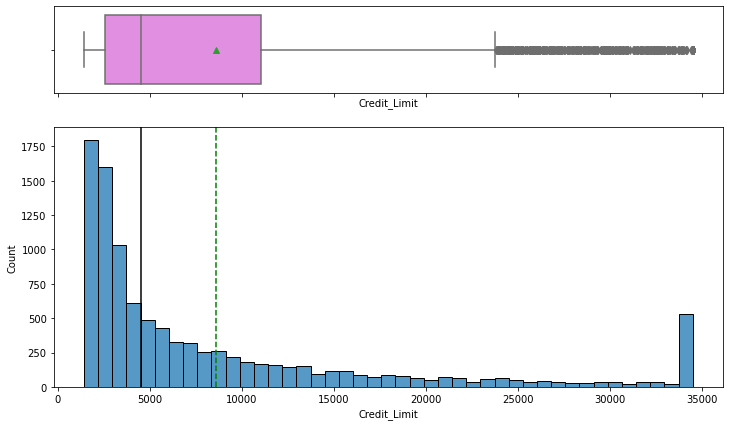

In [278]:
histogram_boxplot(df, "Credit_Limit")

The distribution has a sharp right skew as we had previously expected. There are a number of people with very high credit limits, which may correspond to high income individuals.

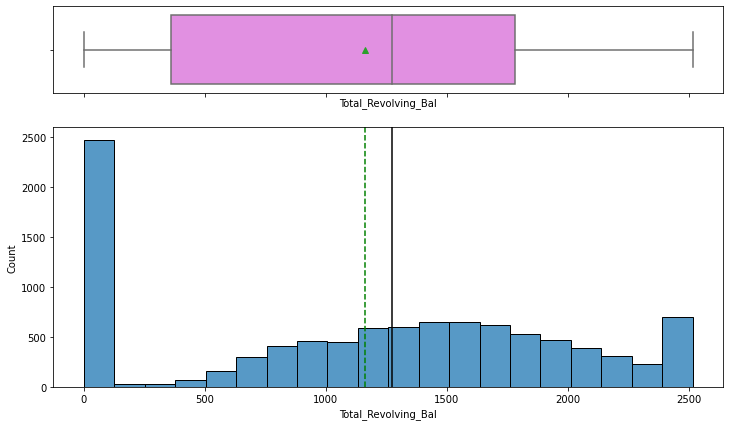

In [279]:
histogram_boxplot(df, "Total_Revolving_Bal")

This is a normal distribution in the middle, with sharp peaks at the two ends. 
The 0 balance records need to be looked at to see if there is anything unusual.

The zero revolving balances means that quite a significant number of people don't carry credit card balances from month to month and pay off in full every month.

In [280]:
df[df['Total_Revolving_Bal']==0]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
2                   0            51      M                3        Graduate   
4                   0            40      M                3      Uneducated   
12                  0            56      M                1         College   
21                  1            62      F                0        Graduate   
24                  0            54      M                2             NaN   
...               ...           ...    ...              ...             ...   
10109               0            47      M                5     High School   
10112               1            33      M                2         College   
10114               0            29      M                0        Graduate   
10124               1            44      F                1     High School   
10125               1            30      M                2        Graduate   

      Marital_Status Income_Category Card_Category  Months_on_book  \
2            Married    $80K - $120K          Blue              36   
4            Married     $60K - $80K          Blue              21   
12            Single    $80K - $120K          Blue              36   
21           Married  Less than $40K          Blue              49   
24           Married    $80K - $120K          Blue              42   
...              ...             ...           ...             ...   
10109         Single  Less than $40K          Blue              35   
10112        Married         $120K +          Gold              20   
10114        Married  Less than $40K          Blue              15   
10124        Married  Less than $40K          Blue              36   
10125            NaN     $40K - $60K          Blue              36   

       Total_Relationship_Count  Months_Inactive_12_mon  \
2                             4                       1   
4                             5                       1   
12                            3                       6   
21                            2                       3   
24                            4                       2   
...                         ...                     ...   
10109                         4                       3   
10112                         2                       1   
10114                         3                       1   
10124                         5                       3   
10125                         4                       3   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
2                          0      3418.000                    0   
4                          0      4716.000                    0   
12                         0     11751.000                    0   
21                         3      1438.300                    0   
24                         3     12217.000                    0   
...                      ...           ...                  ...   
10109                      5      4165.000                    0   
10112                      4     34516.000                    0   
10114                      5      4700.000                    0   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
2             3418.000                 2.594             1887              20   
4             4716.000                 2.175              816              28   
12           11751.000                 3.397             1539              17   
21            1438.300                 1.047              692              16   
24           12217.000                 1.075             1110              21   
...                ...                   ...              ...             ...   
10109         4165.000                 0.813            17093             111   
10112        34516.000                 1.004           

I see that there are all kinds of different values for credit limits for these individuals. This simply means that a lot of people actually do not carry a balance from month to month on their credit cards, and they pay off their credit card balances in full.

This doesn't look suspicious and may be real data. 2740 people, or 27% of the customer base, pays off their credit card balances in full every month.

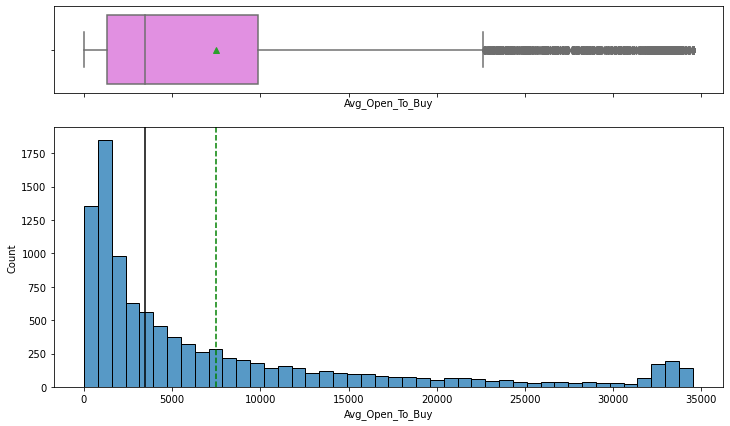

In [281]:
histogram_boxplot(df, "Avg_Open_To_Buy")

Another heavily right skewed data. Interestingly, the pattern is almost identical to the credit limit.

Initially I was thinking that people are maxing out credit cards, hence the "open to buy" has such a right skew. But since this pattern is so similar to the credit limit, the opposite is true - people are not utilizing much of the credit limits and are perhaps not using the credit cards heavily.

The utilization rate will give me a better picture.

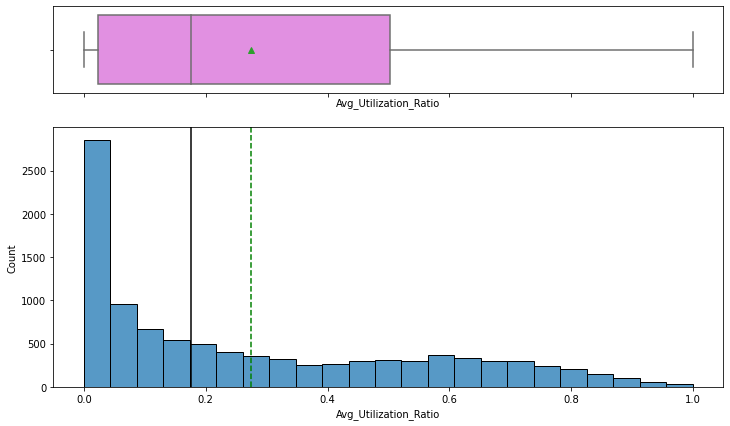

In [282]:
histogram_boxplot(df, "Avg_Utilization_Ratio")

The utilization rate confirms that a majority of people are not really utilizing much of their credit limits, hence they are not using the credit card very much.

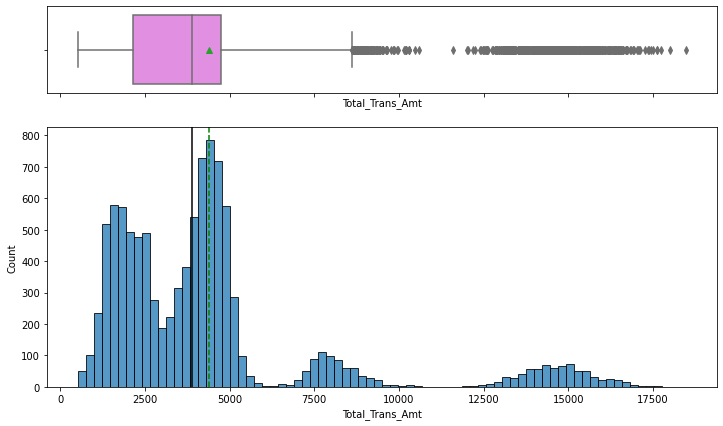

In [283]:
histogram_boxplot(df, "Total_Trans_Amt")

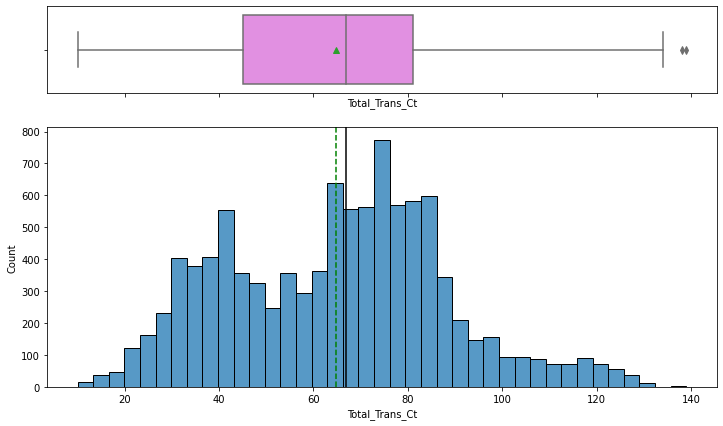

In [284]:
histogram_boxplot(df, "Total_Trans_Ct")

The total transaction count is a normal distribution, but the total transaction amount has 4 peaks. That means that the data really has overlapping categories of customers, perhaps different earning ranges, who utilize the cards in different ways.

Ideally, these different categories of customers should be separated out and analyzed in their own groups. But I will not have the time to do that.

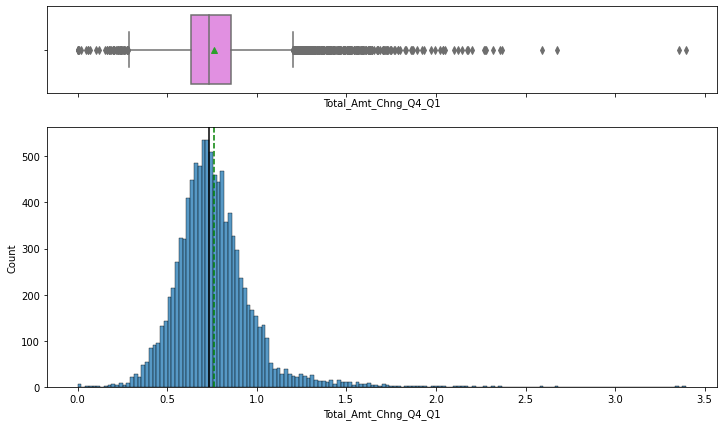

In [285]:
histogram_boxplot(df, "Total_Amt_Chng_Q4_Q1")

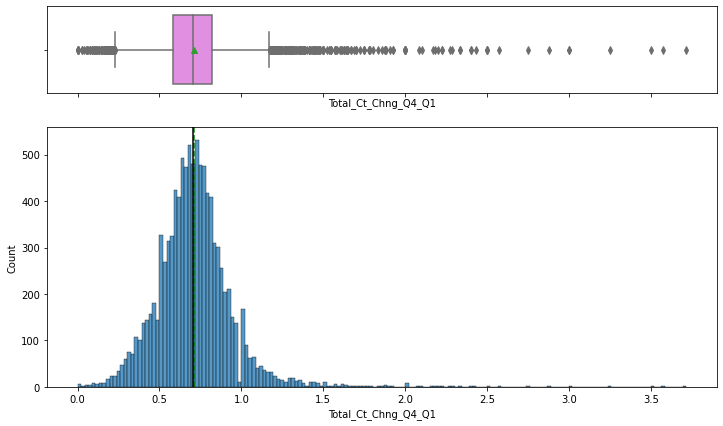

In [286]:
histogram_boxplot(df, "Total_Ct_Chng_Q4_Q1")

The Q4 to Q1 amount change and count change graphs are normal distributions but they both have significant outliers. Need to clip the data as part of feature engineering to handle the outliers.

#### **Now for some analysis of the categorical data as well as numerical data that are discrete in nature.**

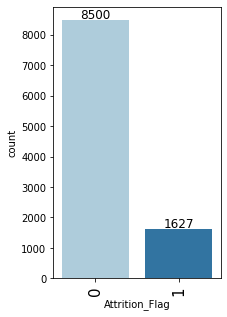

In [287]:
labeled_barplot(df, "Attrition_Flag")

As we have previously noted, there is a 5:1 ratio of people who keep the credit card and those who drop it.

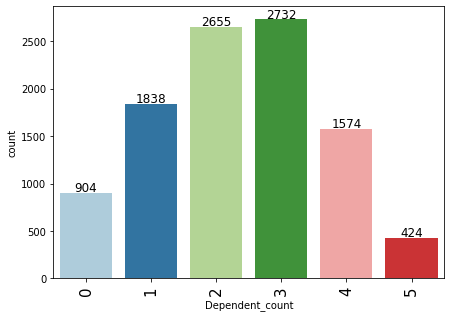

In [288]:
labeled_barplot(df, "Dependent_count")

Most people have 2-3 dependents (spouse and/or children).

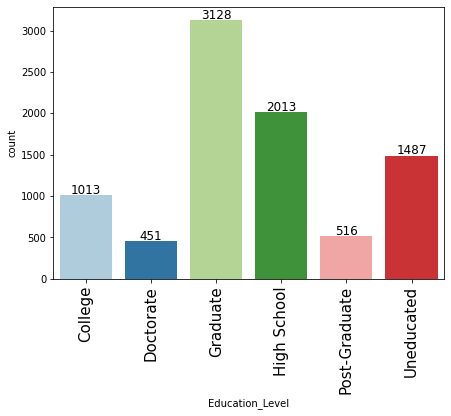

In [289]:
labeled_barplot(df, "Education_Level")

The biggest population of customers are graduates, with the second biggest having education till high school. There is a significant population of uneducated people as well.
- Graduates make up 36% of customers (whose data we have right now).
- High school graduates make up 23% of available data.
- Uneducated people make up 17% of available data.

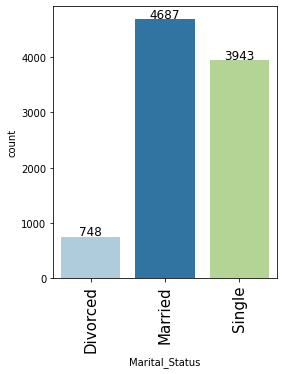

In [290]:
labeled_barplot(df, "Marital_Status")

Married customers make up 50% of the customers.

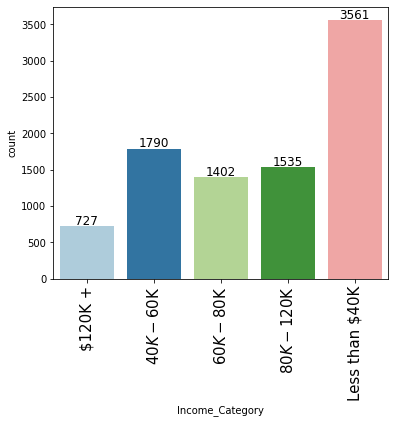

In [291]:
labeled_barplot(df, "Income_Category")

The majority of customers have income less than $40K.

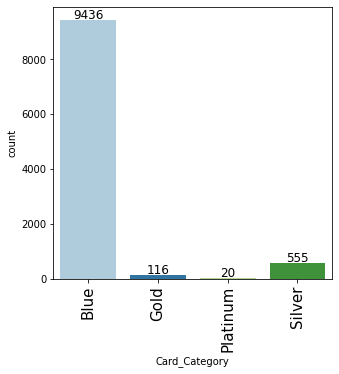

In [292]:
labeled_barplot(df, "Card_Category")

Most people have the Blue card, which is probably the entry level card. Other cards, which may have more benefits, and perhaps annual fee, etc. is a lot less common. Blue cards make up 93% of all cards issued.

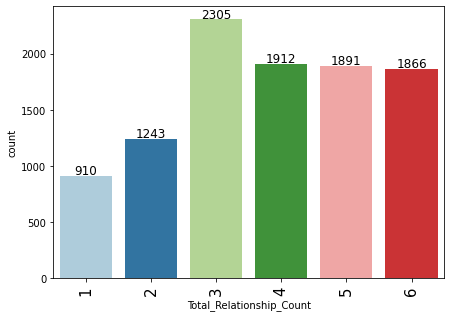

In [293]:
labeled_barplot(df, "Total_Relationship_Count")

Most customers tend to keep 3 or more types of accounts/products with the bank. Only 9% of customers have a single account/product with the bank.

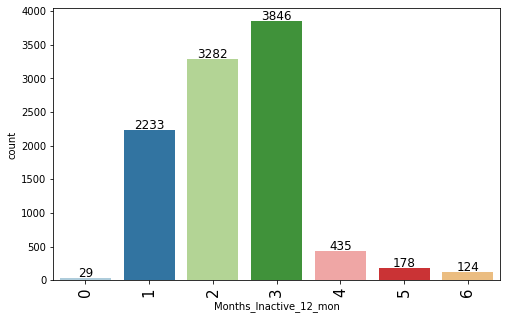

In [294]:
labeled_barplot(df, "Months_Inactive_12_mon")

It is not unusual for customers to not have interaction with bank every month. A majority of customers have between 2-3 months of inactivity.

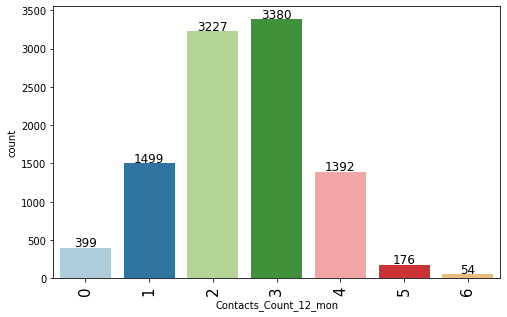

In [295]:
labeled_barplot(df, "Contacts_Count_12_mon")

Most customers have between 2-3 interactions with the bank in a 12 month period.

### **Bivariate Analysis**

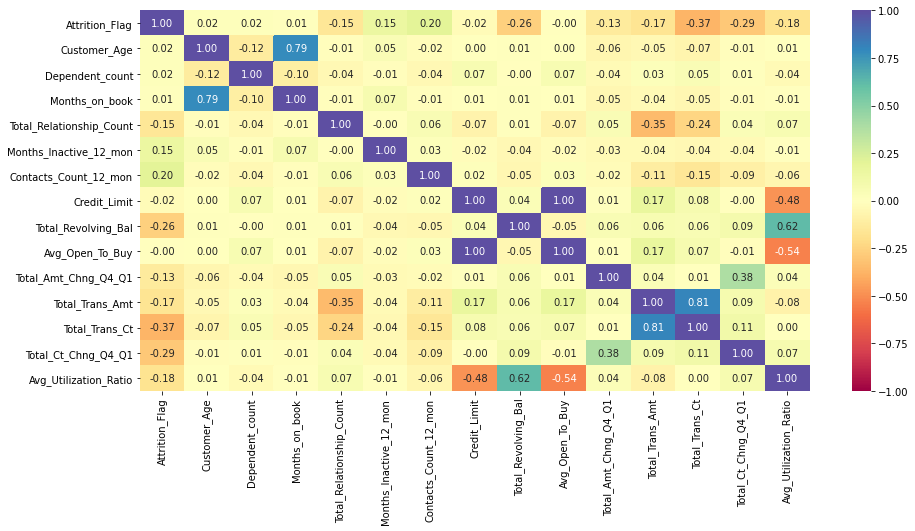

In [296]:
# Let's start off with a heat map
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### **Observations**
- There is strong correlation between `Customer_Age` and `Months_on_book`. This is not suprising since older people are likely to have had a longer relationship with the bank. I will drop `Customer_Age` during feature engineering.
- There is a 1.0 correlation between `Credit_Limit` and `Avg_Open_To_Buy`. I will drop the column `Avg_Open_To_Buy` during feature engineering.
- There is strong correlation between `Total_Trans_Ct` and `Total_Trans_Amt`. I will drop the column `Total_Trans_Amt` since it had the multiple peaks and could be problematic.
- There is also a significant correlation (0.62) between `Avg_Utilization_Ratio` and ``Total_Revolving_Balance`. I will drop the column  `Avg_Utilization_Ratio` since it has significant correlation with two other features.

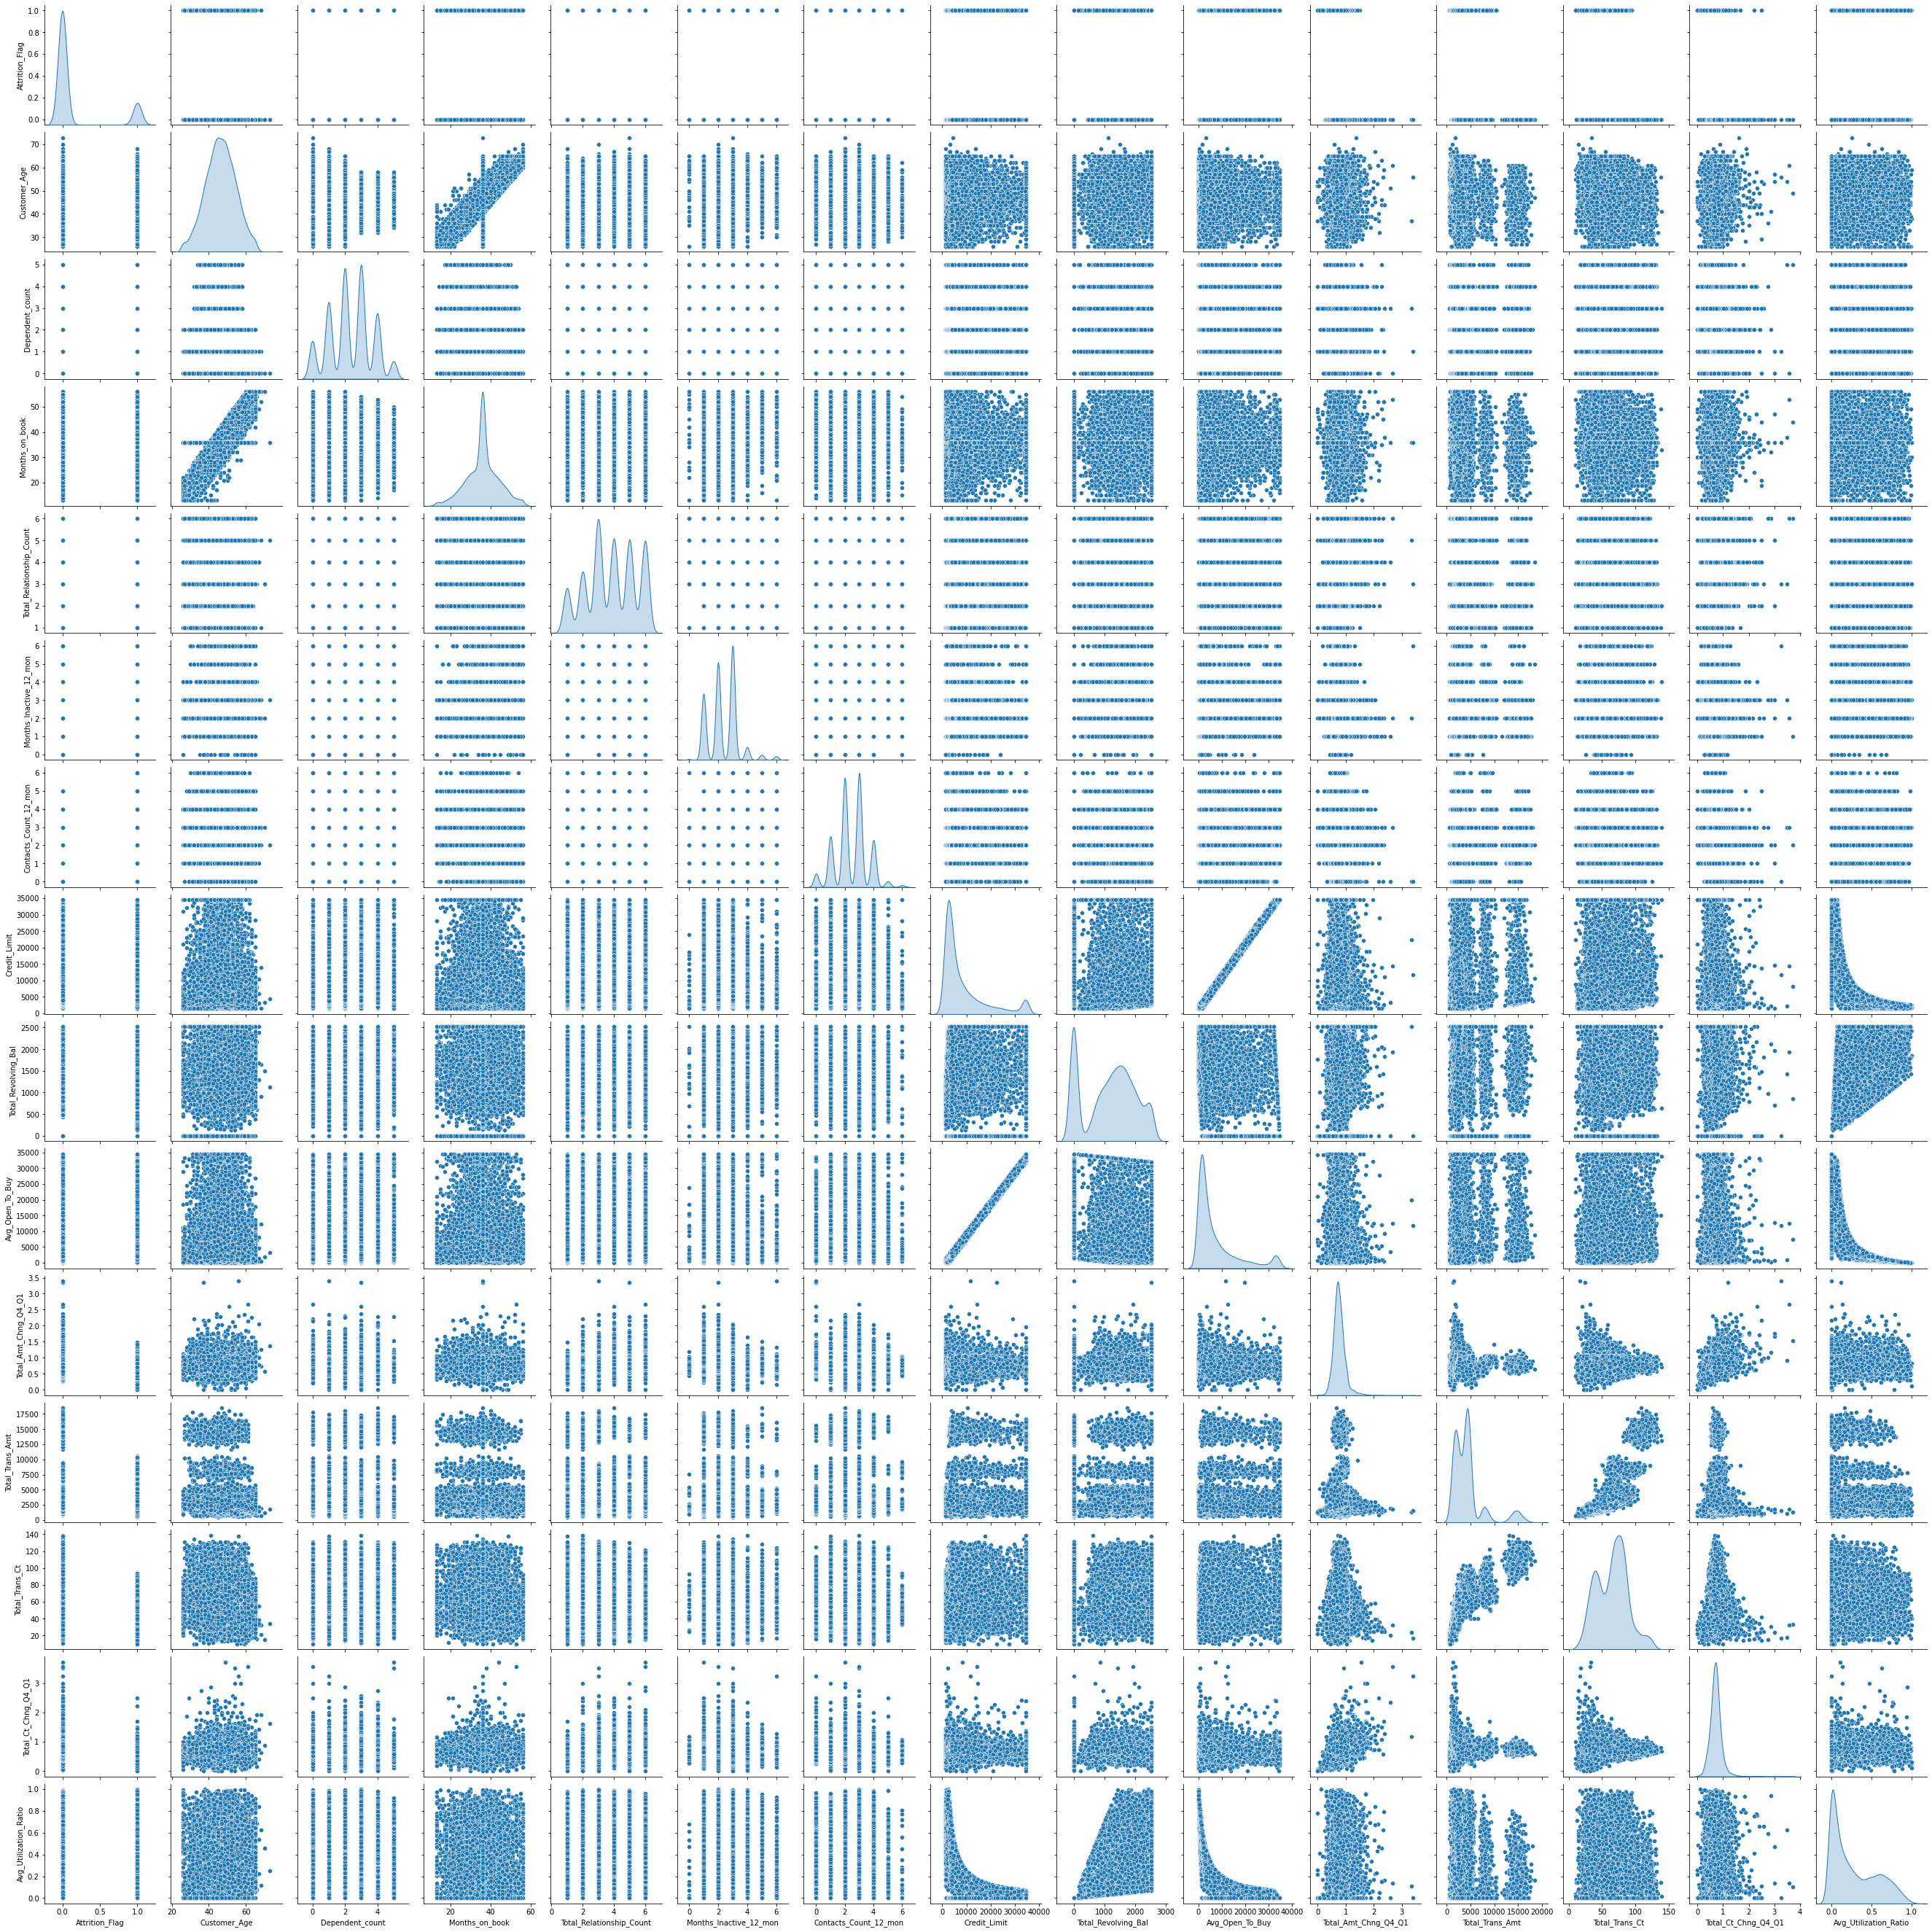

In [297]:
# Time to do some pairplot.
sns.pairplot(data=df, diag_kind="kde")
plt.show()

The heatmap and the pairplot both show that there isn't a clear pattern or correlation between those who continue to keep the credit card and those who have attrition.

Hence, we will need to look at each individual combination separately.

#### **Once again borrowing function from MLS class instead of creating my own**

In [298]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag     0     1    All
Months_on_book                   
All             8500  1627  10127
36              2033   430   2463
39               277    64    341
37               296    62    358
30               242    58    300
38               290    57    347
34               296    57    353
41               246    51    297
33               257    48    305
40               288    45    333
35               272    45    317
32               245    44    289
28               232    43    275
44               188    42    230
43               231    42    273
46               161    36    197
42               235    36    271
29               207    34    241
31               284    34    318
45               194    33    227
25               134    31    165
24               132    28    160
48               135    27    162
50                71    25     96
49               117    24    141
26               162    24    186
47               147    24    171
27            

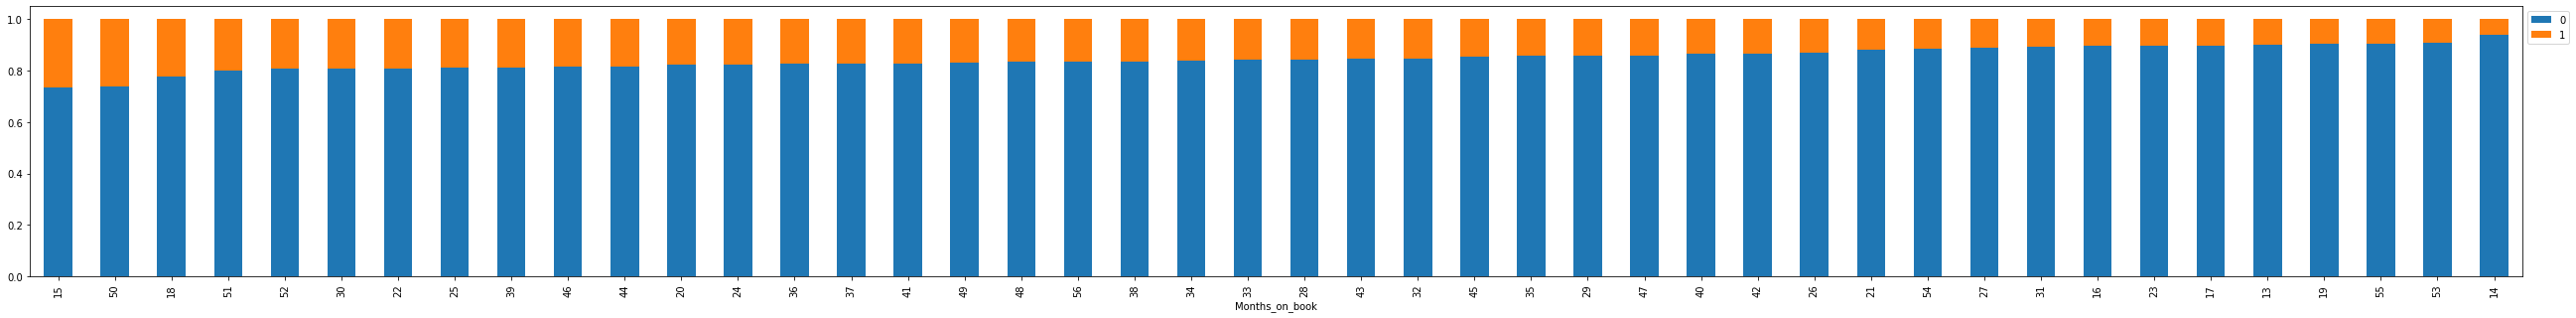

In [299]:
stacked_barplot(df, 'Months_on_book', 'Attrition_Flag')

People who have had accounts for shorter period of time are more likely to have an attrition.

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


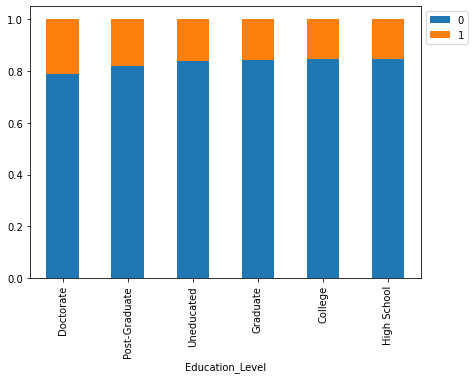

In [300]:
stacked_barplot(df, 'Education_Level', 'Attrition_Flag')

People with Doctorate degrees have a slightly greater chance of attrition. Other than that, there doesn't seem to be a huge variation by level of education.

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


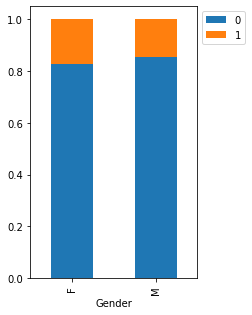

In [301]:
stacked_barplot(df, 'Gender', 'Attrition_Flag')

Women are slightly more likely than men to renounce their credit cards than men.

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


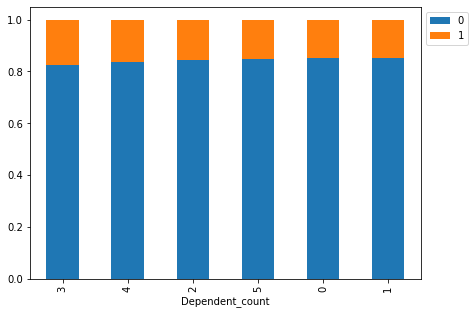

In [302]:
stacked_barplot(df, 'Dependent_count', 'Attrition_Flag')

Dependent count doesn't seem to affect attrition.

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


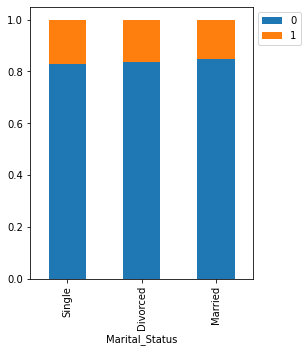

In [303]:
stacked_barplot(df, 'Marital_Status', 'Attrition_Flag')

Marital status doesn't seem to have an impact on churn.

Attrition_Flag      0     1   All
Income_Category                  
All              7575  1440  9015
Less than $40K   2949   612  3561
$40K - $60K      1519   271  1790
$80K - $120K     1293   242  1535
$60K - $80K      1213   189  1402
$120K +           601   126   727
------------------------------------------------------------------------------------------------------------------------


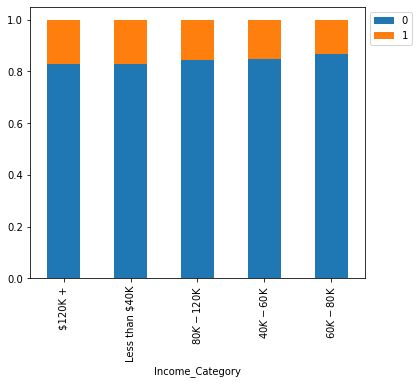

In [304]:
stacked_barplot(df, 'Income_Category', 'Attrition_Flag')

Interestingly, people at the lowest end of income as well as at the highest end of income appear to be slightly more likely to renouce their credit cards.

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


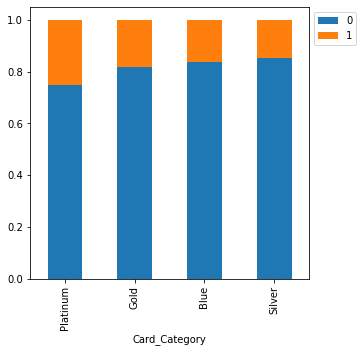

In [305]:
stacked_barplot(df, 'Card_Category', 'Attrition_Flag')

We have a clearer pattern here. People with platinum and gold cards are more likely to give up their credit cards than those with Blue or Silver cards.

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


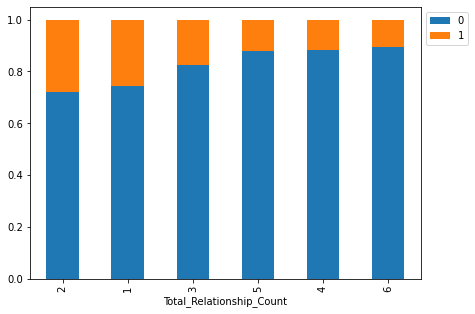

In [306]:
stacked_barplot(df, 'Total_Relationship_Count', 'Attrition_Flag')

Another pattern emerges here. People with fewer number of products with the bank are more likely to have a churn - especially people with just 1 or 2 products.

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


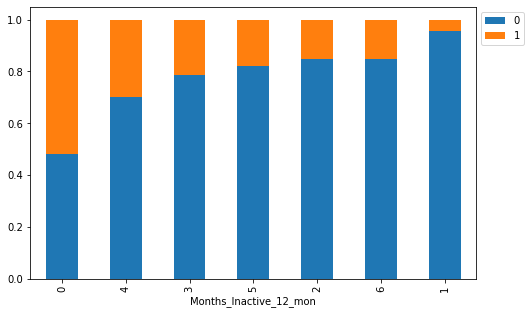

In [307]:
stacked_barplot(df, 'Months_Inactive_12_mon', 'Attrition_Flag')

There is an interesting pattern here.
- People who have not been inactive at all are more likely to have a churn. However, this needs to be taken with a pinch of salt since there are only 29 data points for this.
- People with 3-4 months of inactivity are also more likely to have a churn.

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


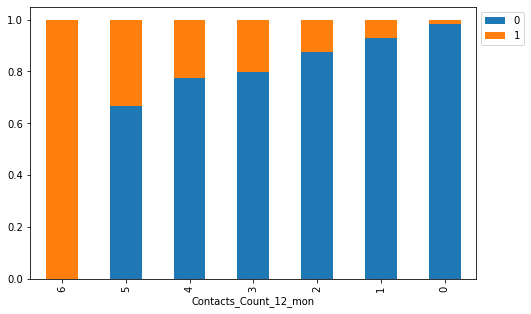

In [308]:
stacked_barplot(df, 'Contacts_Count_12_mon', 'Attrition_Flag')

This is very interesting. As the number of contacts between the bank and the customer increases, the likelihood of churn goes up quickly. In fact, at 6 contacts there is 100% churn.

#### Function borrowed from MLS class.

In [309]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for " + target + "=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for " + target + "=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

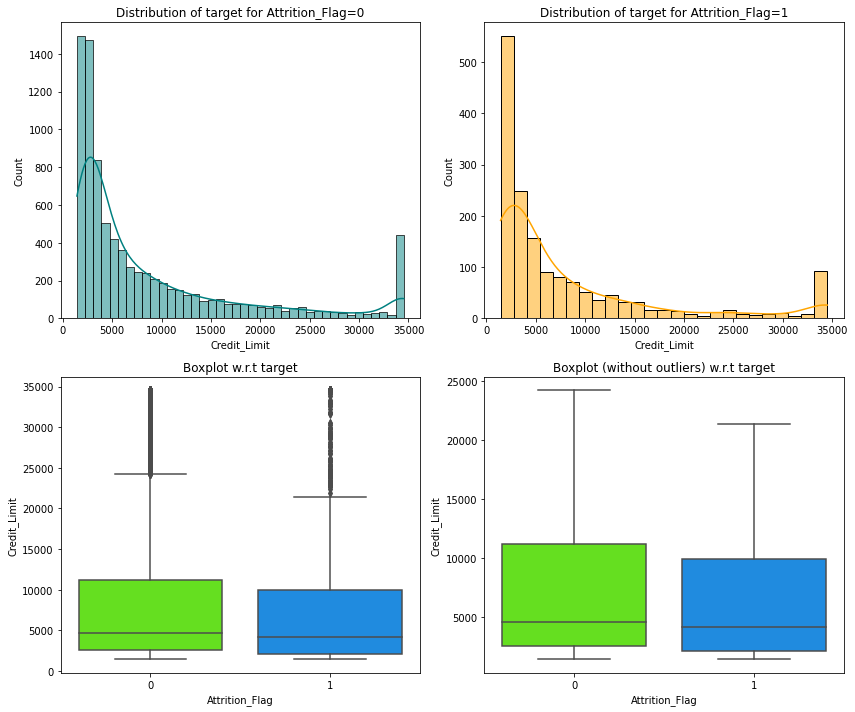

In [310]:
distribution_plot_wrt_target(df, "Credit_Limit", "Attrition_Flag")

There is a big overlap of people who stay and those who renouce for the credit limit range. There is no clear pattern.

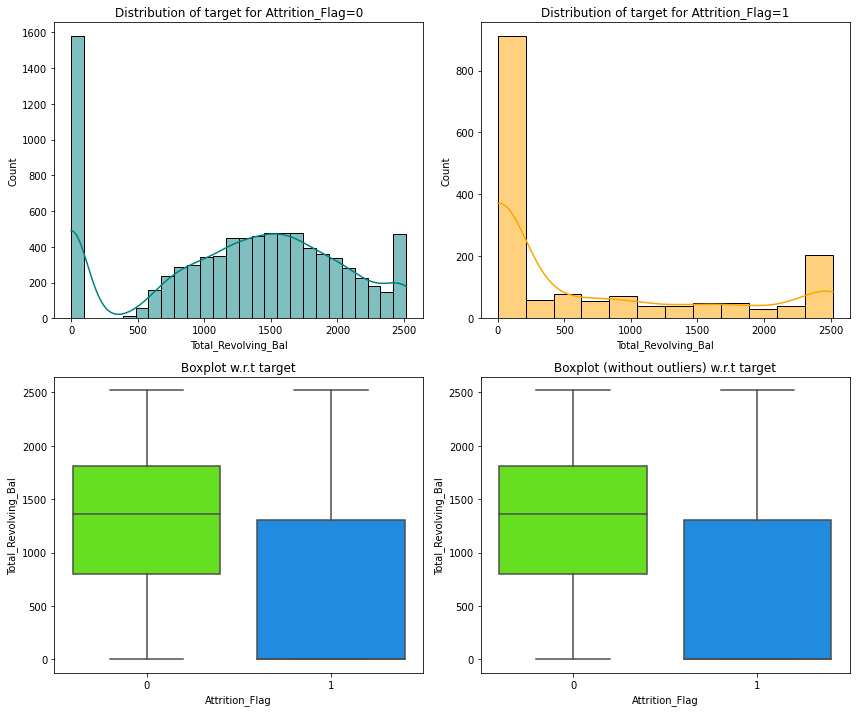

In [311]:
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag")

Attrition appears to be lower for people who have larger revolving balances. Perhaps it is more difficult for them to get out of debt and they keep their credit cards.

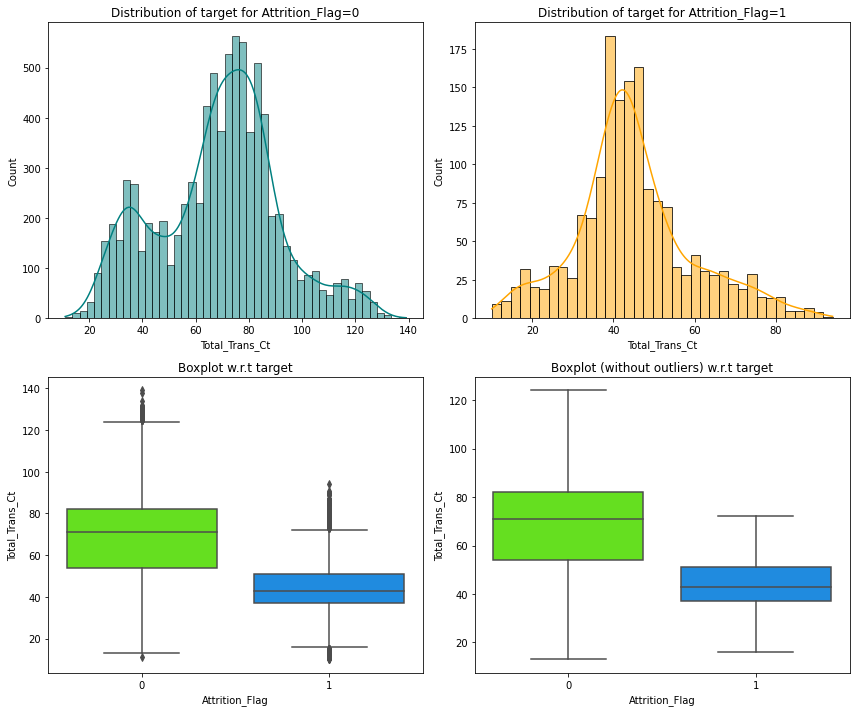

In [312]:
distribution_plot_wrt_target(df, "Total_Trans_Ct", "Attrition_Flag")

People with fewer transactions have a higher likelihood of churn.

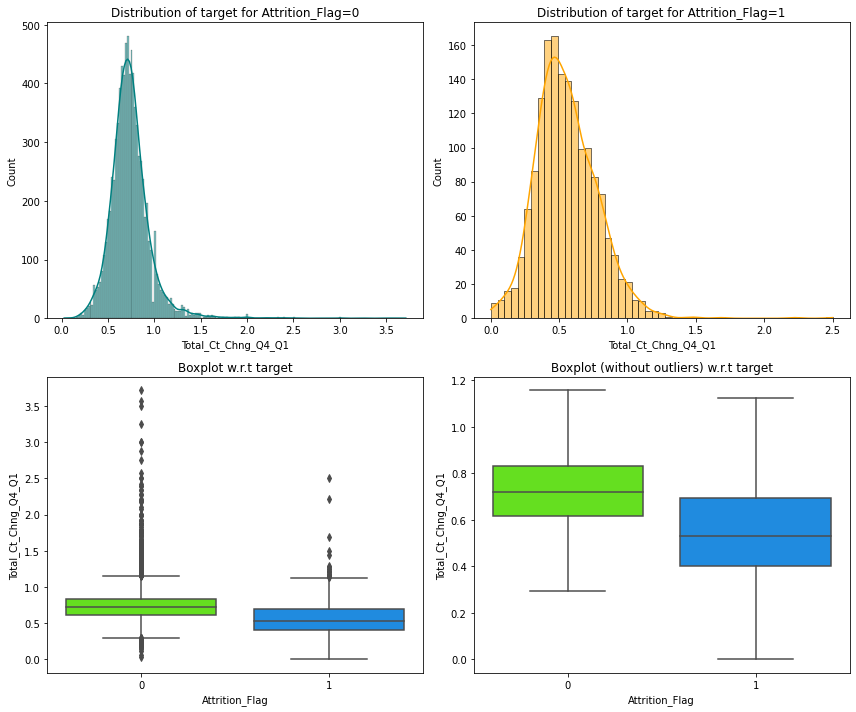

In [313]:
distribution_plot_wrt_target(df, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

Ignoring the outliers, this shows that people whose transactions dropped by 40% or more in Q1 compared to Q4 are more likely to renounce their credit cards.

On the flip side, people whose transactions increased in Q1 compared to Q4 are likely to keep their credit cards.

### **Summary of EDA**

There are certain risks that are starting to show up.
- Women are slightly more likely to renouce their credit cards than men.
- People with doctorate degrees slightly more likely to have churn.
- People with shorter relationships with the bank are at greater risk of churn.
- People with 3-4 months of inactivity are at higher risk of a churn.
- Increasing the number of contacts between the bank and the customer increases likelihood of churn.
- People maintaining smaller revolving balances more likely to have churn.
- People with fewer credit card transactions likely to have churn.
- People whose transaction counts drop between Q4 and Q1 by 40% or more are likely to have churn.

## **Feature Engineering**

In [605]:
# Make another copy of the data for safety
data1 = df.copy()

Drop all the columns that we identified as redundant

In [606]:
data1.drop(columns=["Customer_Age", "Avg_Open_To_Buy", "Total_Trans_Amt", "Avg_Utilization_Ratio"], inplace=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  int64   
 1   Gender                    10127 non-null  category
 2   Dependent_count           10127 non-null  int64   
 3   Education_Level           8608 non-null   category
 4   Marital_Status            9378 non-null   category
 5   Income_Category           9015 non-null   category
 6   Card_Category             10127 non-null  category
 7   Months_on_book            10127 non-null  int64   
 8   Total_Relationship_Count  10127 non-null  int64   
 9   Months_Inactive_12_mon    10127 non-null  int64   
 10  Contacts_Count_12_mon     10127 non-null  int64   
 11  Credit_Limit              10127 non-null  float64 
 12  Total_Revolving_Bal       10127 non-null  int64   
 13  Total_Amt_Chng_Q4_Q1      10127 non-null  floa

In [607]:
# Let's improve the column data for the income categories
income_category = {"Less than $40K": 'Less40', "$40K - $60K": '40_60', "$60K - $80K": '60_80', "$80K - $120K": '80_120', "$120K +": '120More'}
data1["Income_Category"] = data1["Income_Category"].map(income_category)

We had previously identified that the `Education_Level` and `Marital_Status` columns will need to be imputed. In order to use the KNN imputer, we will need to convert the categorical data into numbers as required by the imputer. Later on, we will restore the original values through a reverse mapping.

In [608]:
reqd_col_for_impute = ['Gender', 'Card_Category', 'Marital_Status', 'Education_Level', 'Income_Category']

In [609]:
# Time to impute each of the sets of data using KNN Imputer
imputer = KNNImputer(n_neighbors=1)
#imputer = SimpleImputer(strategy='median')

In [610]:
for i in reqd_col_for_impute:
  print(data1[i].value_counts())
  print("-" * 30)

F    5358
M    4769
Name: Gender, dtype: int64
------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
------------------------------
Less40     3561
40_60      1790
80_120     1535
60_80      1402
120More     727
Name: Income_Category, dtype: int64
------------------------------


In [611]:
gender = {"M": 0, "F": 1}
data1["Gender"] = data1["Gender"].map(gender)

In [612]:
card_cat = {"Blue": 0, "Silver": 1, "Gold": 2, "Platinum": 3}
data1["Card_Category"] = data1["Card_Category"].map(card_cat)

In [613]:
marital_status = {"Married": 0, "Single": 1, "Divorced": 2}
data1["Marital_Status"] = data1["Marital_Status"].map(marital_status)

In [614]:
education_level = {"Uneducated": 0, "High School": 1, "College": 2, "Graduate": 3, "Post-Graduate": 4, "Doctorate": 5}
data1["Education_Level"] = data1["Education_Level"].map(education_level)

In [615]:
income_category = {"Less40": 0, "40_60": 1, "60_80": 2, "80_120": 3, "120More": 4}
data1["Income_Category"] = data1["Income_Category"].map(income_category)

In [616]:
# Verify that the conversions really happened
data1.head(10)

Attrition_Flag Gender  Dependent_count Education_Level Marital_Status  \
0               0      0                3               1              0   
1               0      1                5               3              1   
2               0      0                3               3              0   
3               0      1                4               1            NaN   
4               0      0                3               0              0   
5               0      0                2               3              0   
6               0      0                4             NaN              0   
7               0      0                0               1            NaN   
8               0      0                3               0              1   
9               0      0                2               3              1   

  Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0               2             0              39                         5   
1               0             0              44                         6   
2               3             0              36                         4   
3               0             0              34                         3   
4               2             0              21                         5   
5               1             0              36                         3   
6               4             2              46                         6   
7               2             1              27                         2   
8               2             0              36                         5   
9               3             0              36                         6   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3     12691.000   
1                       1                      2      8256.000   
2                       1                      0      3418.000   
3                       4                      1      3313.000   
4                       1                      0      4716.000   
5                       1                      2      4010.000   
6                       1                      3     34516.000   
7                       2                      2     29081.000   
8                       2                      0     22352.000   
9                       3                      3     11656.000   

   Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Ct  \
0                  777                 1.335              42   
1                  864                 1.541              33   
2                    0                 2.594              20   
3                 2517                 1.405              20   
4                    0                 2.175              28   
5                 1247                 1.376              24   
6                 2264                 1.975              31   
7                 1396                 2.204              36   
8                 2517                 3.355              24   
9                 1677                 1.524              32   

   Total_Ct_Chng_Q4_Q1  
0                1.625  
1                3.714  
2                2.333  
3                2.333  
4                2.500  
5                0.846  
6                0.722  
7                0.714  
8                1.182  
9                0.882

### Split up data for modeling. Also ensure that imputing happens in separate groups of data

In [617]:
X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

In [618]:
# Split data into train, validation, and test. Has to be done in 2-rounds.
# First separate out the test data. Then split the remaining to get train and validation.
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 15) (2026, 15) (2026, 15)


In [619]:
# Check the count of null values before impute, so that we can later verify that we did the impute correctly
print(X_train.isnull().sum())
print("-" * 30)
print(X_val.isnull().sum())
print("-" * 30)
print(X_test.isnull().sum())

Gender                        0
Dependent_count               0
Education_Level             928
Marital_Status              457
Income_Category             654
Card_Category                 0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                  0
Total_Revolving_Bal           0
Total_Amt_Chng_Q4_Q1          0
Total_Trans_Ct                0
Total_Ct_Chng_Q4_Q1           0
dtype: int64
------------------------------
Gender                        0
Dependent_count               0
Education_Level             294
Marital_Status              140
Income_Category             221
Card_Category                 0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                  0
Total_Revolving_Bal           0
Total_Amt_Chng_Q4_Q1          0
Total_Trans_Ct                0
Total_Ct_Chng_Q4_Q1         

In [620]:
# Let's quickly verify that the numbers have been replaced with categorical data
for i in cols_to_impute:
    print(X_train[i].value_counts())
    print("*" * 30)

0    2819
1    2369
2     430
Name: Marital_Status, dtype: int64
******************************
3    1854
1    1228
0     881
2     618
4     312
5     254
Name: Education_Level, dtype: int64
******************************
0    2129
1    1059
3     953
2     831
4     449
Name: Income_Category, dtype: int64
******************************


In [621]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the train data
X_val[reqd_col_for_impute] = imputer.fit_transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.fit_transform(X_test[reqd_col_for_impute])

In [622]:
# Validate that the impute worked
print(X_train.isnull().sum())
print("-" * 30)
print(X_val.isnull().sum())
print("-" * 30)
print(X_test.isnull().sum())

Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
dtype: int64
------------------------------
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
dtype: int64
------------------------------
Gender      

In [623]:
# Now reverse map the data to bring back the original categorical form.

# Use a function that was used in the MLS class.
## Function to inverse the encoding
def inverse_mapping(x, col):
    inv_dict = {v: k for k, v in x.items()}
    X_train[col] = np.round(X_train[col]).map(inv_dict).astype("category")
    X_val[col] = np.round(X_val[col]).map(inv_dict).astype("category")
    X_test[col] = np.round(X_test[col]).map(inv_dict).astype("category")

In [624]:
inverse_mapping(gender, "Gender")
inverse_mapping(card_cat, "Card_Category")
inverse_mapping(income_category, "Income_Category")
inverse_mapping(marital_status, "Marital_Status")
inverse_mapping(education_level, "Education_Level")

In [625]:
# Create dummy variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 25) (2026, 25) (2026, 25)


## Building the model

### Model evaluation criterion:
Bank wants to know which of the customers is likely to give up their credit cards. The bank needs to follow up with them or generally engage with them so that they continue to be a credit card customer.

As a result, it is very important to **minimize False-Negatives**.

The best way to minimize False Negatives is to **maximize the Recall Score**

### Approach
I will create 6 different models, and do K-fold cross-validation. Then I will verify the result on the Vaidation set. And finally, if the results look acceptable and generalizable, then I will test against the test data to evaluate results on unseen data.

In [626]:
models = []  # Empty list to store all the models

# Appending 6 models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores*100))


Cross-Validation Performance:

dtree: 63.83778126635269
Bagging: 63.73155416012559
Random forest: 63.62637362637362
GBM: 68.54631083202511
Adaboost: 68.34118262689691
Xgboost: 67.11145996860282

Validation Performance:

dtree: 68.71165644171779
Bagging: 65.6441717791411
Random forest: 67.79141104294479
GBM: 73.31288343558282
Adaboost: 72.69938650306749
Xgboost: 73.31288343558282


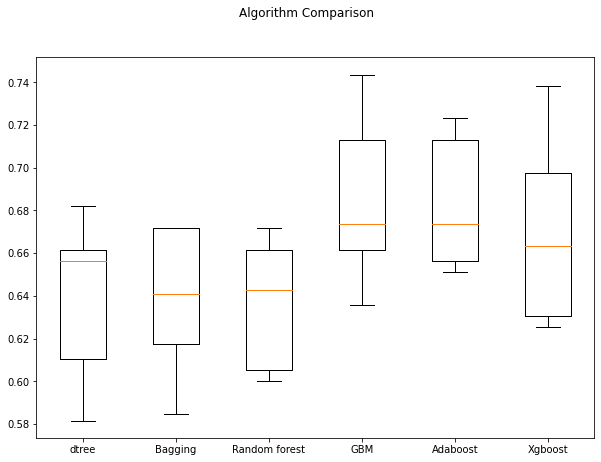

In [627]:
## This plot has been taken from the examples in the MLS class

# Plot boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

All the models are working better on the validation data than on the training data.

- XGBoost and GradientBoost are both working equally well on the validation data with recall scores of 73.3%
- AdaBoost is the next best performer at recall score of 72.7%

My 3 best performers are XGBoost, GradientBoost, and AdaBoost.

### **Model Tuning Using Randomized Search**

#### Copying utility functions from MLS class to render the confusion matrix, etc.

In [628]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [629]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### **Improve the AdaBoost model**

In [630]:

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)    # We want to use 'recall' as the metrics of interest

#Calling RandomizedSearchCV with 5-fold cross-validation, and 50 iterations
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')} with CV score=0.7141391941391941:


In [632]:
# Now that we have the best parameters for AdaBoost, let's make the best model.

# building model with best parameters
adb_tuned = AdaBoostClassifier(
    n_estimators=20,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)

# Fit the model on training data
adb_tuned.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [633]:
# Calculating different metrics on train set
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned, X_train, y_train
)
print("Training performance:")
Adaboost_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.952   0.817      0.876 0.845

In [634]:
# Calculating different metrics on validation set
Adaboost_random_val = model_performance_classification_sklearn(adb_tuned, X_val, y_val)
print("Validation performance:")
Adaboost_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.921   0.718      0.772 0.744

This AdaBoost model is actually overfitting the training data, and capturing noise. The performance of recall score on the validation set has degraded from that of the training set.

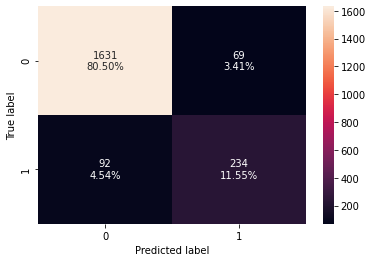

In [635]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned, X_val, y_val)

### **Improve the XGBoost Model**

In [636]:
# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV with 50 iterations an 5-fold cross-validation
xgb_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned.best_params_,xgb_tuned.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 10, 'reg_lambda': 10, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 1} with CV score=0.9323704866562009:


In [637]:
# Now that we know the best parameters, we can make the model the with the best parameters

xgb_tuned = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=10,
    gamma=1,
    subsample=0.9,
    learning_rate=0.1,
    eval_metric="logloss",
    max_depth=1,
    reg_lambda=10,
)
# Fit the model on training data
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=10, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [638]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
print("Training performance:")
xgboost_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.709   0.930      0.348 0.507

In [639]:
# Calculating different metrics on validation set
xgboost_random_val = model_performance_classification_sklearn(xgb_tuned, X_val, y_val)
print("Validation performance:")
xgboost_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.708   0.936      0.349 0.508

This has given me consistent results between the training set and the validation set at 0.93. This result is expected to be genralizable to test data set.

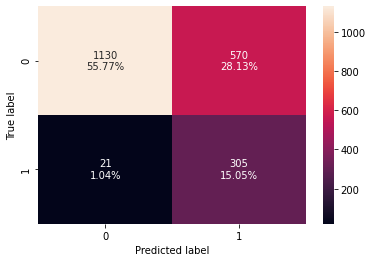

In [640]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_val, y_val)

### **Improving the GradientBoost model**

In [641]:
# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'learning_rate':[0.01,0.1,0.2,0.05],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV with 50 iterations an 5-fold cross-validation
gradb_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
gradb_tuned.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(gradb_tuned.best_params_,gradb_tuned.best_score_))

Best parameters are {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2} with CV score=0.7059392987964417:


In [642]:
# Now that we have the best parameters for the model, let's make the GradientBoost model
gradb_tuned =GradientBoostingClassifier(
    random_state=1,
    subsample=0.8,
    n_estimators=100,
    max_depth=4,
    learning_rate=0.2
)
# Fit the model on training data
gradb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [643]:
# Calculating different metrics on train set
Gradboost_random_train = model_performance_classification_sklearn(
    gradb_tuned, X_train, y_train
)
print("Training performance:")
Gradboost_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.979   0.901      0.968 0.933

In [644]:
# Calculating different metrics on validation set
Gradboost_random_val = model_performance_classification_sklearn(
    gradb_tuned, X_val, y_val
)
print("Validation performance:")
Gradboost_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.941   0.767      0.850 0.806

This model degraded significantly from the training data set to the validation data set. So this model is overfitting the training data

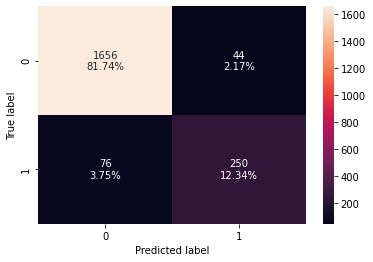

In [645]:
# creating confusion matrix
confusion_matrix_sklearn(gradb_tuned, X_val, y_val)

### **Let's Oversample the data to account for the bias for the value of 0 for the Attrition_Flag**

### **Oversampling using SMOTE**

In [646]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 976
Before UpSampling, counts of label 'No': 5099 

After UpSampling, counts of label 'Yes': 5099
After UpSampling, counts of label 'No': 5099 

After UpSampling, the shape of train_X: (10198, 25)
After UpSampling, the shape of train_y: (10198,) 



#### **Evaluate tuned AdaBoost Model on the oversampled data**

In [647]:
# Fit the model on training data
adb_tuned.fit(X_train_over, y_train_over)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [648]:
# Calculating different metrics on train set
Adaboost_random_train_over = model_performance_classification_sklearn(
    adb_tuned, X_train_over, y_train_over
)
print("Training performance:")
Adaboost_random_train_over

Training performance:


Accuracy  Recall  Precision    F1
0     0.965   0.959      0.971 0.965

In [649]:
# Calculating different metrics on train set
Adaboost_random_val_over = model_performance_classification_sklearn(
    adb_tuned, X_val, y_val
)
print("Validation performance:")
Adaboost_random_val_over

Validation performance:


Accuracy  Recall  Precision    F1
0     0.929   0.730      0.812 0.769

Oversampling has not helped with AdaBoost model.

#### **Evaluate tuned XGBoost Model on the oversampled data**

In [650]:
# Fit the model on oversampled training data
xgb_tuned.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=10, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [651]:
# Calculating different metrics on train set
XGBoost_random_train_over = model_performance_classification_sklearn(
    xgb_tuned, X_train_over, y_train_over
)
print("Training performance:")
XGBoost_random_train_over

Training performance:


Accuracy  Recall  Precision    F1
0     0.681   0.997      0.611 0.758

In [652]:
# Calculating different metrics on train set
XGBoost_random_val_over = model_performance_classification_sklearn(
    xgb_tuned, X_val, y_val
)
print("Validation performance:")
XGBoost_random_val_over

ValueError: ignored

#### **Evaluate tuned GradientBoost Model on the oversampled data**

In [653]:
# Fit the model on oversampled training data
gradb_tuned.fit(X_train_over, y_train_over)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [654]:
# Calculating different metrics on train set
GradBoost_random_train_over = model_performance_classification_sklearn(
    gradb_tuned, X_train_over, y_train_over
)
print("Training performance:")
GradBoost_random_train_over

Training performance:


Accuracy  Recall  Precision    F1
0     0.985   0.980      0.989 0.985

In [655]:
# Calculating different metrics on validation set
GradBoost_random_val_over = model_performance_classification_sklearn(
    gradb_tuned, X_val, y_val
)
print("Validation performance:")
GradBoost_random_val_over

Validation performance:


Accuracy  Recall  Precision    F1
0     0.935   0.761      0.821 0.790

Once again, the recall score has degraded in the validation model. So this model is overfitting the data.

## **Now to evaluate the tuned model on undersampled data.**

### In this case, we will remove entries from the majority target variable.

In [656]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [657]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 25)
After Under Sampling, the shape of train_y: (1952,) 



### **Evaluate Tuned AdaBoost model with undersampled data**

In [658]:
# Fit the model on training data
adb_tuned.fit(X_train_un, y_train_un)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [659]:
# Calculating different metrics on train set
Adaboost_random_train_un = model_performance_classification_sklearn(
    adb_tuned, X_train_un, y_train_un
)
print("Training performance:")
Adaboost_random_train_un

Training performance:


Accuracy  Recall  Precision    F1
0     0.950   0.953      0.947 0.950

In [660]:
# Calculating different metrics on train set
Adaboost_random_val_un = model_performance_classification_sklearn(
    adb_tuned, X_val, y_val
)
print("Validation performance:")
Adaboost_random_val_un

Validation performance:


Accuracy  Recall  Precision    F1
0     0.876   0.862      0.576 0.690

Model is still overfitting, but the performance on the validation model is better.

### **Evaluate Tuned XGBoost model with undersampled data**

In [661]:
# Fit the model on undersampled training data
xgb_tuned.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=10, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [662]:
# Calculating different metrics on train set
XGBoost_random_train_un = model_performance_classification_sklearn(
    xgb_tuned, X_train_un, y_train_un
)
print("Training performance:")
XGBoost_random_train_un

Training performance:


Accuracy  Recall  Precision    F1
0     0.633   0.995      0.577 0.730

In [663]:
# Calculating different metrics on validation set
XGBoost_random_val_un = model_performance_classification_sklearn(
    xgb_tuned, X_val, y_val
)
print("Validation performance:")
XGBoost_random_val_un

ValueError: ignored

### **Evaluate Tuned GradientBoost model with undersampled data**

In [664]:
# Fit the model on undersampled training data
gradb_tuned.fit(X_train_un, y_train_un)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [665]:
# Calculating different metrics on undersampled train set
GradBoost_random_train_un = model_performance_classification_sklearn(
    gradb_tuned, X_train_un, y_train_un
)
print("Training performance:")
GradBoost_random_train_un

Training performance:


Accuracy  Recall  Precision    F1
0     0.999   1.000      0.998 0.999

In [666]:
# Calculating different metrics on validation set
GradBoost_random_val_un = model_performance_classification_sklearn(
    gradb_tuned, X_val, y_val
)
print("Validation performance:")
GradBoost_random_val_un

Validation performance:


Accuracy  Recall  Precision    F1
0     0.909   0.896      0.659 0.759

The recall on the validation set is 0.896 although the model is clearly overfitting the training model.

### **Finally let's test the models on the test set**

In [667]:
# Calculating different metrics on test set
Adaboost_random_test = model_performance_classification_sklearn(
    adb_tuned, X_test, y_test
)
print("Test performance:")
Adaboost_random_test

Test performance:


Accuracy  Recall  Precision    F1
0     0.874   0.886      0.569 0.693

In [668]:
# Calculating different metrics on test set
XGBoost_random_test = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
print("Test performance:")
XGBoost_random_test

ValueError: ignored

In [669]:
# Calculating different metrics on test set
GradBoost_random_test = model_performance_classification_sklearn(
    gradb_tuned, X_test, y_test
)
print("Test performance:")
GradBoost_random_test

Test performance:


Accuracy  Recall  Precision    F1
0     0.908   0.926      0.649 0.763

#### I am getting the best Recall performance on the test data from the **GradientBoost model with the training data undersampling**, which is giving me **0.926 recall** and an **accuracy of 0.908.**

### **Relative Feature Importance**

In [694]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature.)

print(pd.DataFrame(gradb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                                Imp
Total_Trans_Ct                0.402
Total_Revolving_Bal           0.189
Total_Ct_Chng_Q4_Q1           0.084
Total_Amt_Chng_Q4_Q1          0.079
Total_Relationship_Count      0.058
Credit_Limit                  0.054
Contacts_Count_12_mon         0.033
Months_on_book                0.029
Months_Inactive_12_mon        0.026
Gender_M                      0.013
Dependent_count               0.012
Education_Level_Uneducated    0.004
Card_Category_Gold            0.003
Income_Category_80_120        0.003
Card_Category_Silver          0.002
Marital_Status_Married        0.002
Income_Category_40_60         0.002
Education_Level_Post-Graduate 0.001
Education_Level_Graduate      0.001
Education_Level_Doctorate     0.001
Marital_Status_Single         0.001
Income_Category_60_80         0.001
Education_Level_High School   0.001
Card_Category_Platinum        0.000
Income_Category_Less40        0.000


## **Business Recommendation**

Based on the relative imporatnce of the various features, top 5 actions:
- Total transaction count is most important in retention. Work on making it as easy as possible for people to use their credit cards. Engage with people who do not use their credit card regularly. Give them incentives like cash back to use their cards.
- People with high revolving balance tend to stay. So once again, encourage ingrequent users to make more purchases. Give cash-back or gifts that are tied to their total purchases.
- Watch out for patterns where use of credit card decreased from Q4 to Q1 and engage with those customers.
- Maintain contact with the customers regularly.
- Increase credit card limits to make it easier for people to make large purchases.